In [ ]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/CSE_438 Project/Dataset/Stockdata.csv')

In [ ]:
df.head(10)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,9-Dec-22,"11,641.50","11,748.00","11,517.00","11,569.75","11,569.75","600,826"
1,8-Dec-22,"11,500.00","11,685.75","11,433.00","11,645.50","11,645.50","600,826"
2,7-Dec-22,"11,566.00","11,596.25","11,422.50","11,509.50","11,509.50","634,691"
3,6-Dec-22,"11,812.00","11,846.25","11,502.00","11,566.00","11,566.00","657,271"
4,5-Dec-22,"12,000.50","12,015.75","11,745.50","11,805.75","11,805.75","537,924"
5,2-Dec-22,"12,039.75","12,067.75","11,740.50","12,010.25","12,010.25","588,295"
6,1-Dec-22,"12,079.25","12,145.00","11,943.25","12,062.75","12,062.75","629,297"
7,30-Nov-22,"11,520.00","12,078.50","11,497.75","12,042.25","12,042.25","769,082"
8,29-Nov-22,"11,625.00","11,704.50","11,465.00","11,524.75","11,524.75","555,859"
9,28-Nov-22,"11,731.25","11,788.50","11,575.25","11,616.25","11,616.25","506,250"


In [ ]:
sf = df.iloc[::-1]

In [ ]:
sf.head(100)

,Date,Open,High,Low,Close*,Adj Close**,Volume
2005,2-Jan-15,"4,240.25","4,272.75","4,201.00","4,214.25","4,214.25","229,555"
2004,5-Jan-15,"4,216.00","4,220.75","4,145.00","4,161.75","4,161.75","313,771"
2003,6-Jan-15,"4,166.50","4,172.50","4,082.00","4,102.25","4,102.25","426,154"
2002,7-Jan-15,"4,105.50","4,163.25","4,102.75","4,151.50","4,151.50","328,184"
2001,8-Jan-15,"4,152.25","4,242.75","4,152.25","4,232.25","4,232.25","272,056"
...,...,...,...,...,...,...,...
1910,19-May-15,"4,501.75","4,534.00","4,482.25","4,505.50","4,505.50","170,963"
1909,20-May-15,"4,500.00","4,536.50","4,486.50","4,528.75","4,528.75","123,530"
1908,21-May-15,"4,530.50","4,542.00","4,522.00","4,528.75","4,528.75","100,980"
1907,25-May-15,"4,527.50","4,538.50","4,455.00","4,479.75","4,479.75","228,084"


In [ ]:
sf['Date']

2005    2-Jan-15
2004    5-Jan-15
2003    6-Jan-15
2002    7-Jan-15
2001    8-Jan-15
          ...   
4       5-Dec-22
3       6-Dec-22
2       7-Dec-22
1       8-Dec-22
0       9-Dec-22
Name: Date, Length: 2006, dtype: object

In [ ]:
sf['Date']= pd.to_datetime(sf['Date'])

In [ ]:
sf['Date']

2005   2015-01-02
2004   2015-01-05
2003   2015-01-06
2002   2015-01-07
2001   2015-01-08
          ...    
4      2022-12-05
3      2022-12-06
2      2022-12-07
1      2022-12-08
0      2022-12-09
Name: Date, Length: 2006, dtype: datetime64[ns]

In [ ]:
sf['Close*']

2005     4,214.25
2004     4,161.75
2003     4,102.25
2002     4,151.50
2001     4,232.25
          ...    
4       11,805.75
3       11,566.00
2       11,509.50
1       11,645.50
0       11,569.75
Name: Close*, Length: 2006, dtype: object

In [ ]:
sf.replace(',','', regex=True, inplace=True)

In [ ]:
c = sf.select_dtypes(object).columns
sf[c] = sf[c].apply(pd.to_numeric,errors='coerce')

In [ ]:
sf['Close*']

2005     4214.25
2004     4161.75
2003     4102.25
2002     4151.50
2001     4232.25
          ...   
4       11805.75
3       11566.00
2       11509.50
1       11645.50
0       11569.75
Name: Close*, Length: 2006, dtype: float64

In [ ]:
sf.isnull().sum()

Date            0
Open            6
High            6
Low             6
Close*          6
Adj Close**     6
Volume         10
dtype: int64

In [ ]:
sf['High'] = sf['High'].interpolate(option='quadratic')
sf['Low'] = sf['Low'].interpolate(option='quadratic')
sf['Open'] = sf['Open'].interpolate(option='quadratic')
sf['Close*'] = sf['Close*'].interpolate(option='quadratic')
sf['Adj Close**'] = sf['Adj Close**'].interpolate(option='quadratic')
sf['Volume'] = sf['Volume'].interpolate(option='quadratic')

In [ ]:
sf.tail(15)

,Date,Open,High,Low,Close*,Adj Close**,Volume
14,2022-11-21,11723.00,11756.000,11553.000,11588.00,11588.00,477970.0
13,2022-11-22,11588.00,11759.250,11526.500,11754.50,11754.50,531087.0
12,2022-11-23,11741.50,11892.750,11720.000,11862.75,11862.75,474645.0
11,2022-11-24,11809.75,11912.875,11743.125,11822.75,11822.75,363505.5
10,2022-11-25,11878.00,11933.000,11766.250,11782.75,11782.75,252366.0
9,2022-11-28,11731.25,11788.500,11575.250,11616.25,11616.25,506250.0
8,2022-11-29,11625.00,11704.500,11465.000,11524.75,11524.75,555859.0
7,2022-11-30,11520.00,12078.500,11497.750,12042.25,12042.25,769082.0
6,2022-12-01,12079.25,12145.000,11943.250,12062.75,12062.75,629297.0
5,2022-12-02,12039.75,12067.750,11740.500,12010.25,12010.25,588295.0


Text(0, 0.5, 'High Column')

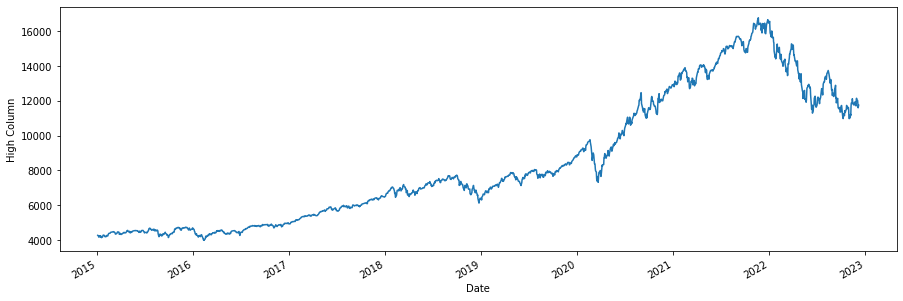

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(sf['Date'], sf['High'], linestyle='solid')
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('High Column')

Text(0, 0.5, 'Low Column')

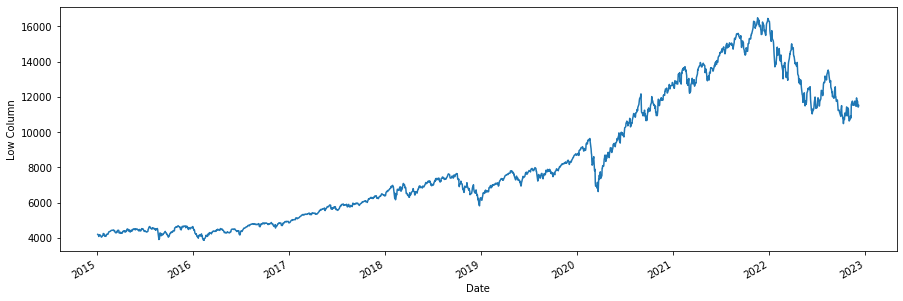

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(sf['Date'], sf['Low'], linestyle='solid')
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Low Column')

Text(0, 0.5, 'Open Column')

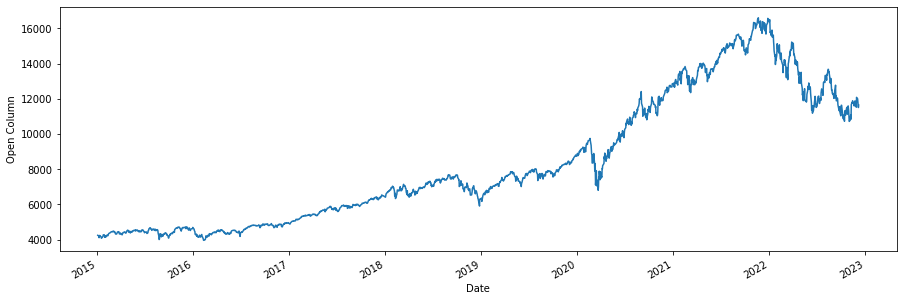

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(sf['Date'], sf['Open'], linestyle='solid')
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Open Column')

Text(0, 0.5, 'Close Column')

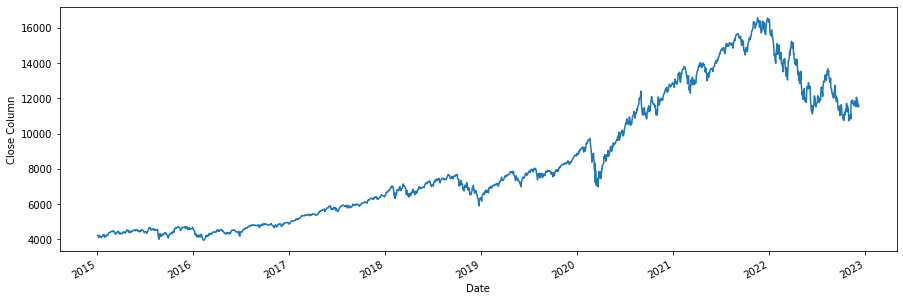

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(sf['Date'], sf['Close*'], linestyle='solid')
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Close Column')

Text(0, 0.5, 'Adjusted Close Column')

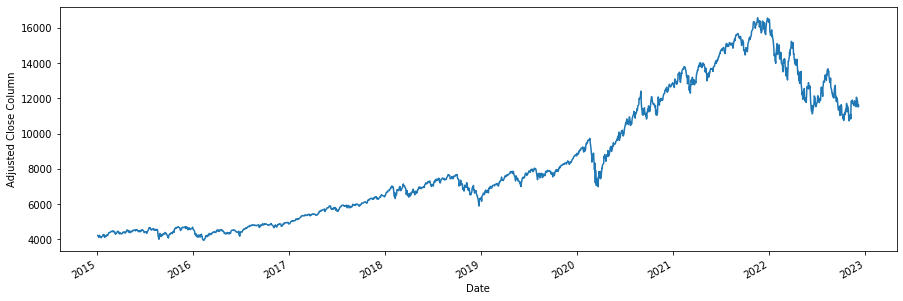

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(sf['Date'], sf['Adj Close**'], linestyle='solid')
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Adjusted Close Column')

Text(0, 0.5, 'Trade Volume')

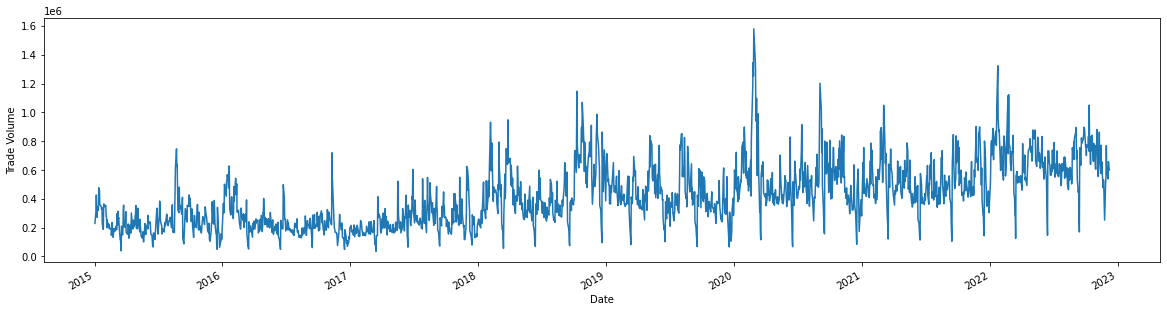

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(sf['Date'], sf['Volume'], linestyle='solid')
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Trade Volume')


In [ ]:
sf1 =sf[sf['Date'].dt.year == 2015]
sf2 =sf[sf['Date'].dt.year == 2016]
sf3 =sf[sf['Date'].dt.year == 2017]
sf4 =sf[sf['Date'].dt.year == 2018]
sf5 =sf[sf['Date'].dt.year == 2019]
sf6 =sf[sf['Date'].dt.year == 2020]
sf7 =sf[sf['Date'].dt.year == 2021]
sf8 =sf[sf['Date'].dt.year == 2022]


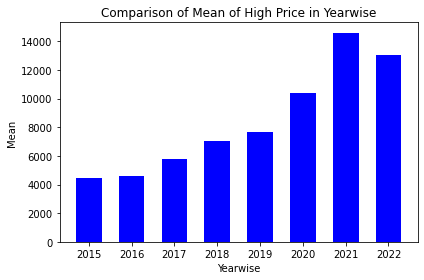

In [ ]:
m1 = sf1['High'].mean()
m2 = sf2['High'].mean()
m3 = sf3['High'].mean()
m4 = sf4['High'].mean()
m5 = sf5['High'].mean()
m6 = sf6['High'].mean()
m7 = sf7['High'].mean()
m8 = sf8['High'].mean()

algo = ['2015' , '2016' , '2017' , '2018' , '2019', '2020', '2021', '2022']
score = [m1, m2, m3, m4, m5, m6, m7, m8]
plt.bar(algo, score, color = 'blue' , width = 0.6)
plt.xlabel("Yearwise")
plt.ylabel("Mean")
plt.title("Comparison of Mean of High Price in Yearwise")
plt.tight_layout()
plt.show()

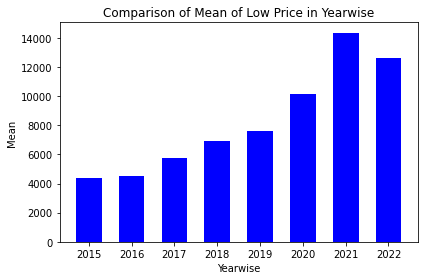

In [ ]:
m1 = sf1['Low'].mean()
m2 = sf2['Low'].mean()
m3 = sf3['Low'].mean()
m4 = sf4['Low'].mean()
m5 = sf5['Low'].mean()
m6 = sf6['Low'].mean()
m7 = sf7['Low'].mean()
m8 = sf8['Low'].mean()

algo = ['2015' , '2016' , '2017' , '2018' , '2019', '2020', '2021', '2022']
score = [m1, m2, m3, m4, m5, m6, m7, m8]
plt.bar(algo, score, color = 'blue' , width = 0.6)
plt.xlabel("Yearwise")
plt.ylabel("Mean")
plt.title("Comparison of Mean of Low Price in Yearwise")
plt.tight_layout()
plt.show()

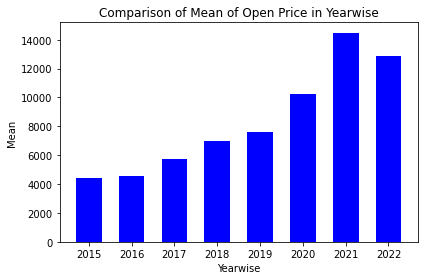

In [ ]:
m1 = sf1['Open'].mean()
m2 = sf2['Open'].mean()
m3 = sf3['Open'].mean()
m4 = sf4['Open'].mean()
m5 = sf5['Open'].mean()
m6 = sf6['Open'].mean()
m7 = sf7['Open'].mean()
m8 = sf8['Open'].mean()

algo = ['2015' , '2016' , '2017' , '2018' , '2019', '2020', '2021', '2022']
score = [m1, m2, m3, m4, m5, m6, m7, m8]
plt.bar(algo, score, color = 'blue' , width = 0.6)
plt.xlabel("Yearwise")
plt.ylabel("Mean")
plt.title("Comparison of Mean of Open Price in Yearwise")
plt.tight_layout()
plt.show()

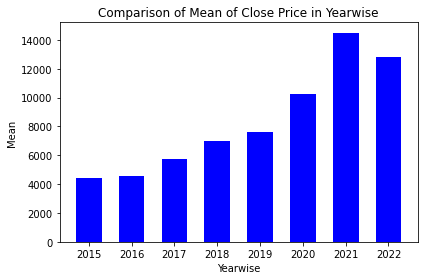

In [ ]:
m1 = sf1['Close*'].mean()
m2 = sf2['Close*'].mean()
m3 = sf3['Close*'].mean()
m4 = sf4['Close*'].mean()
m5 = sf5['Close*'].mean()
m6 = sf6['Close*'].mean()
m7 = sf7['Close*'].mean()
m8 = sf8['Close*'].mean()

algo = ['2015' , '2016' , '2017' , '2018' , '2019', '2020', '2021', '2022']
score = [m1, m2, m3, m4, m5, m6, m7, m8]
plt.bar(algo, score, color = 'blue' , width = 0.6)
plt.xlabel("Yearwise")
plt.ylabel("Mean")
plt.title("Comparison of Mean of Close Price in Yearwise")
plt.tight_layout()
plt.show()

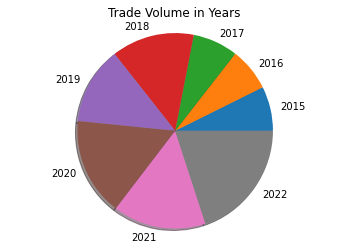

In [ ]:
m1 = sf1['Volume'].mean()
m2 = sf2['Volume'].mean()
m3 = sf3['Volume'].mean()
m4 = sf4['Volume'].mean()
m5 = sf5['Volume'].mean()
m6 = sf6['Volume'].mean()
m7 = sf7['Volume'].mean()
m8 = sf8['Volume'].mean()

y = np.array([m1, m2, m3, m4, m5, m6, m7, m8])
mylabels = ['2015' , '2016' , '2017' , '2018' , '2019', '2020', '2021', '2022']
myexplode = [0.1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

plt.pie(y, labels = mylabels,  shadow = True)

plt.axis('equal')
plt.title("Trade Volume in Years")
plt.show()

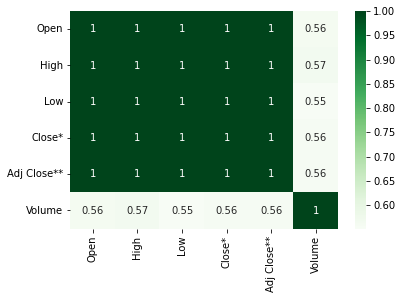

In [ ]:
relation = sf.corr()
sn.heatmap(relation, annot=True, cmap='Greens')
plt.show()